# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

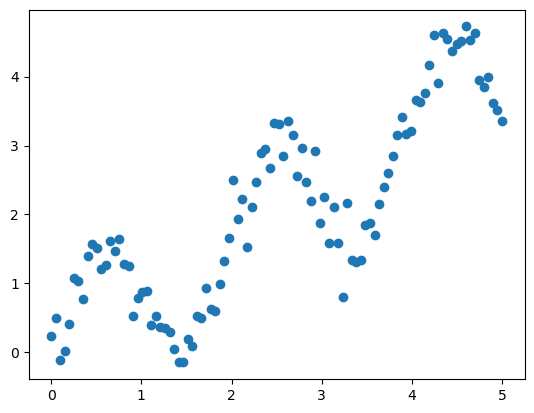

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.6029550782629933


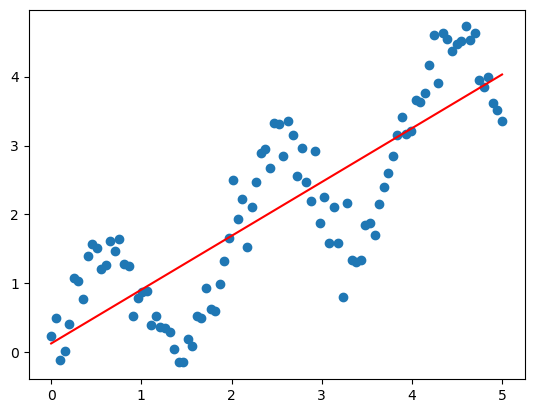

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [12]:
regr_poly.fit(X_poly, y)

LinearRegression()

0.5465629055280645


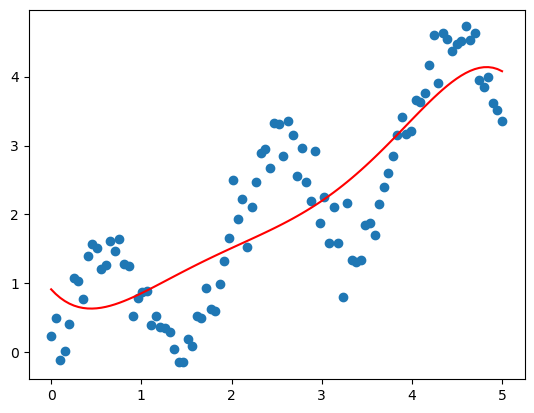

In [17]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')
mse = np.sum((regr_poly.predict(X_poly)-y)**2) / len(y)
print(mse)

In [14]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.44618431  2.3020545  -1.15525004  0.26331936 -0.02154425]
interception:  0.9145238515216656


In [15]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([0.91452385, 0.84720911, 0.79076916, 0.74437165, 0.70722367,
       0.67857085, 0.65769657, 0.64392105, 0.63660056, 0.63512651,
       0.63892466, 0.64745423, 0.66020706, 0.67670676, 0.69650789,
       0.71919505, 0.74438208, 0.7717112 , 0.80085214, 0.83150133,
       0.86338099, 0.89623835, 0.92984476, 0.96399483, 0.99850563,
       1.03321577, 1.06798461, 1.1026914 , 1.13723441, 1.17153007,
       1.20551218, 1.23913099, 1.27235239, 1.30515706, 1.33753961,
       1.36950772, 1.40108132, 1.43229172, 1.46318076, 1.49379997,
       1.52420971, 1.55447833, 1.58468131, 1.61490043, 1.6452229 ,
       1.6757405 , 1.70654879, 1.73774617, 1.76943312, 1.80171128,
       1.83468264, 1.8684487 , 1.90310957, 1.93876316, 1.97550433,
       2.01342404, 2.05260846, 2.09313819, 2.13508735, 2.17852277,
       2.22350311, 2.27007803, 2.31828735, 2.36816015, 2.41971399,
       2.47295402, 2.52787212, 2.5844461 , 2.64263878, 2.7023972 ,
       2.76365176, 2.82631533, 2.89028245, 2.95542846, 3.02160

In [16]:
regr_poly.predict(X_poly)

array([0.91452385, 0.84720911, 0.79076916, 0.74437165, 0.70722367,
       0.67857085, 0.65769657, 0.64392105, 0.63660056, 0.63512651,
       0.63892466, 0.64745423, 0.66020706, 0.67670676, 0.69650789,
       0.71919505, 0.74438208, 0.7717112 , 0.80085214, 0.83150133,
       0.86338099, 0.89623835, 0.92984476, 0.96399483, 0.99850563,
       1.03321577, 1.06798461, 1.1026914 , 1.13723441, 1.17153007,
       1.20551218, 1.23913099, 1.27235239, 1.30515706, 1.33753961,
       1.36950772, 1.40108132, 1.43229172, 1.46318076, 1.49379997,
       1.52420971, 1.55447833, 1.58468131, 1.61490043, 1.6452229 ,
       1.6757405 , 1.70654879, 1.73774617, 1.76943312, 1.80171128,
       1.83468264, 1.8684487 , 1.90310957, 1.93876316, 1.97550433,
       2.01342404, 2.05260846, 2.09313819, 2.13508735, 2.17852277,
       2.22350311, 2.27007803, 2.31828735, 2.36816015, 2.41971399,
       2.47295402, 2.52787212, 2.5844461 , 2.64263878, 2.7023972 ,
       2.76365176, 2.82631533, 2.89028245, 2.95542846, 3.02160

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [19]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [20]:
sigma = 0.3

In [21]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [22]:
regr_rbf = LinearRegression()

In [23]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

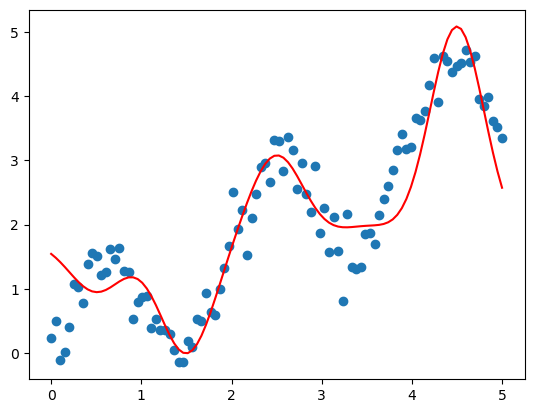

In [24]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [25]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.78494126 -1.74742179  1.3445162   0.22367321  3.34446873]
interception:  1.740242741829639


#### Comparison

In [26]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

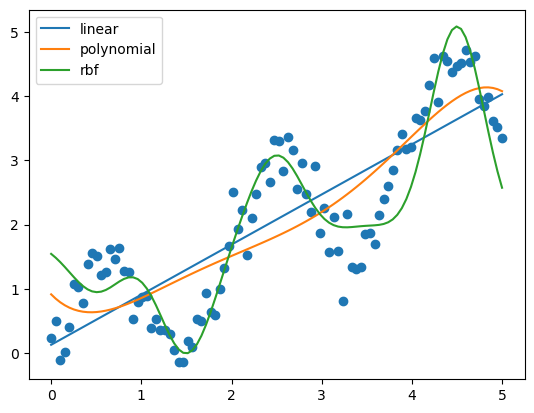

In [27]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [28]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.6029550782629933


In [29]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5465629055280645


In [30]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.2595660891453849
